In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

              price          area    bedrooms   bathrooms     stories  \
count  5.450000e+02    545.000000  545.000000  545.000000  545.000000   
mean   4.766729e+06   5150.541284    2.965138    1.286239    1.805505   
std    1.870440e+06   2170.141023    0.738064    0.502470    0.867492   
min    1.750000e+06   1650.000000    1.000000    1.000000    1.000000   
25%    3.430000e+06   3600.000000    2.000000    1.000000    1.000000   
50%    4.340000e+06   4600.000000    3.000000    1.000000    2.000000   
75%    5.740000e+06   6360.000000    3.000000    2.000000    2.000000   
max    1.330000e+07  16200.000000    6.000000    4.000000    4.000000   

          parking  
count  545.000000  
mean     0.693578  
std      0.861586  
min      0.000000  
25%      0.000000  
50%      0.000000  
75%      1.000000  
max      3.000000  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------

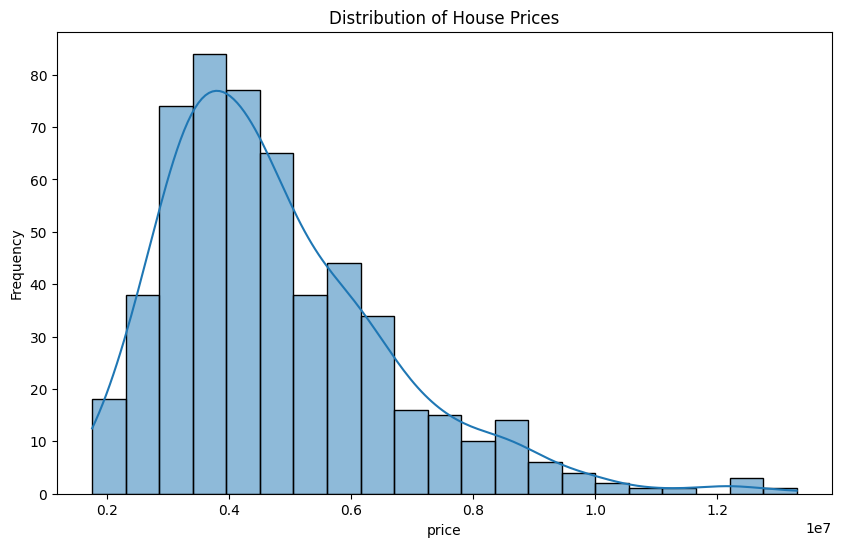

In [19]:
# Load the dataset
df = pd.read_csv('housing.csv')

# Descriptive statistics
print(df.describe())
print(df.info())

# Visualize the distribution of the target variable (Price)
plt.figure(figsize=(10, 6))
sns.histplot(df['price'], kde=True)
plt.title('Distribution of House Prices')
plt.xlabel('price')
plt.ylabel('Frequency')
plt.show()


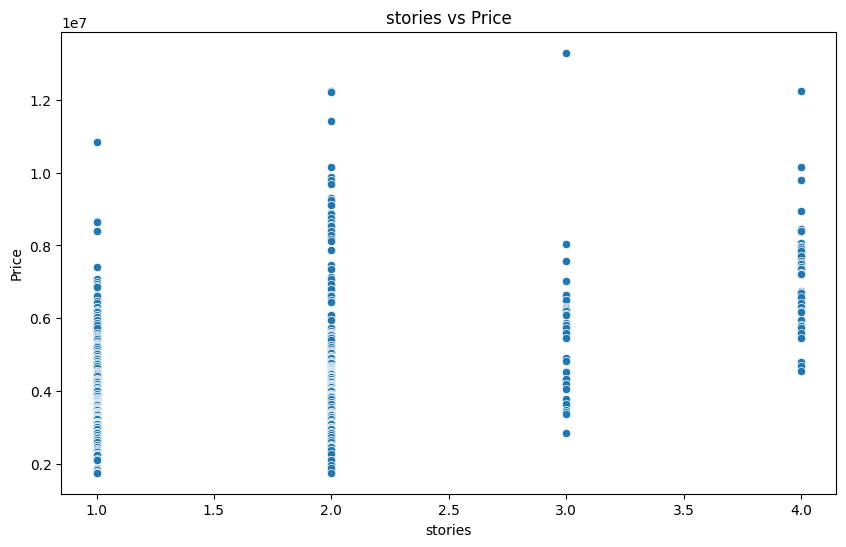

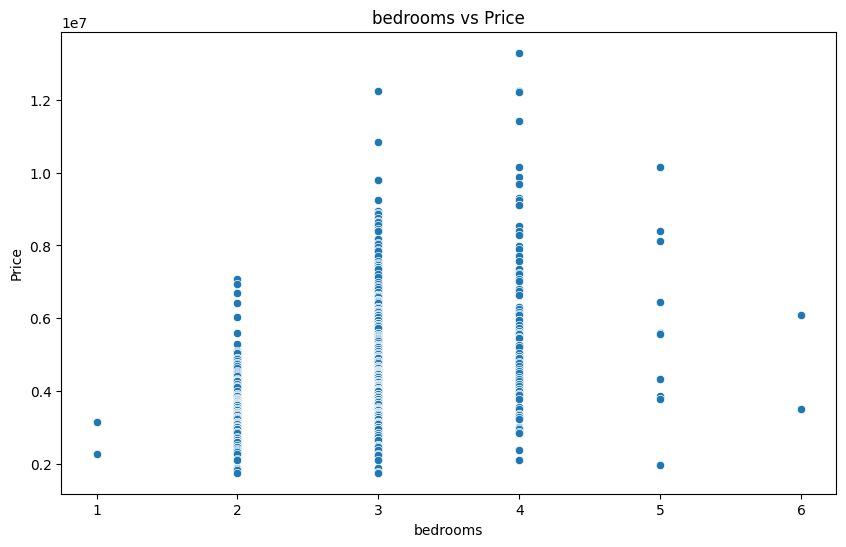

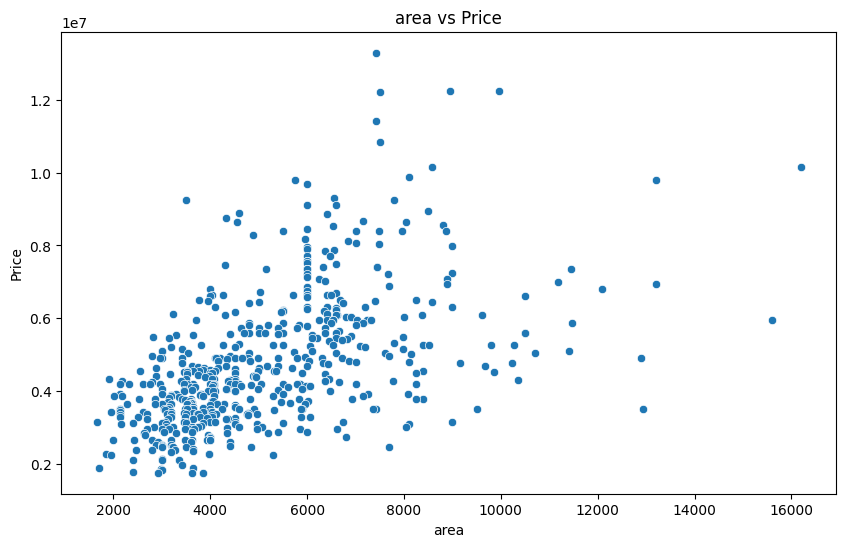

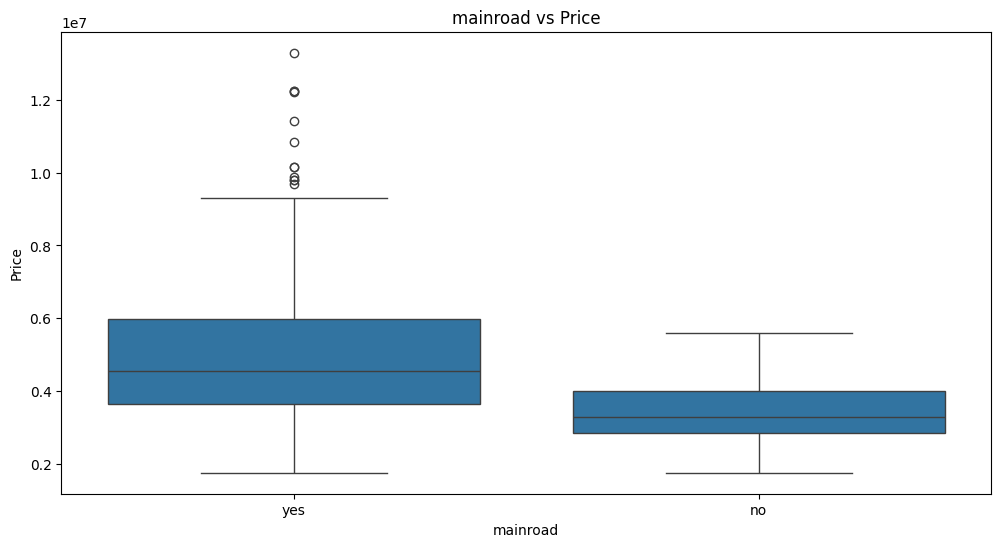

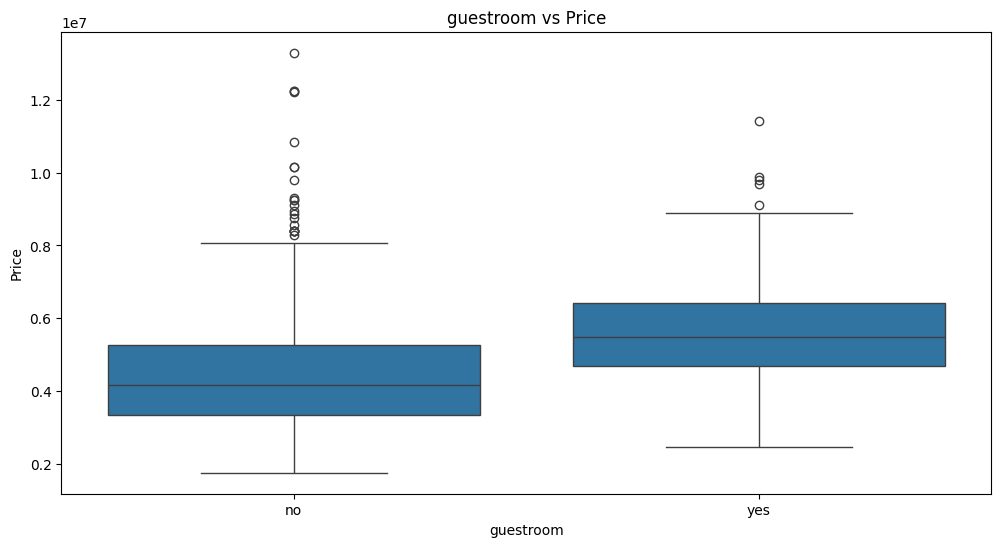

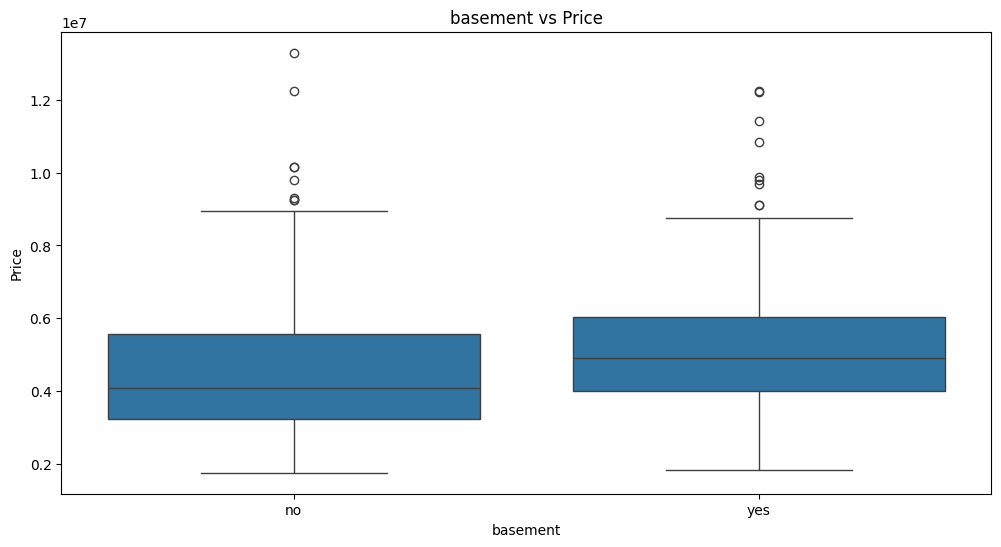

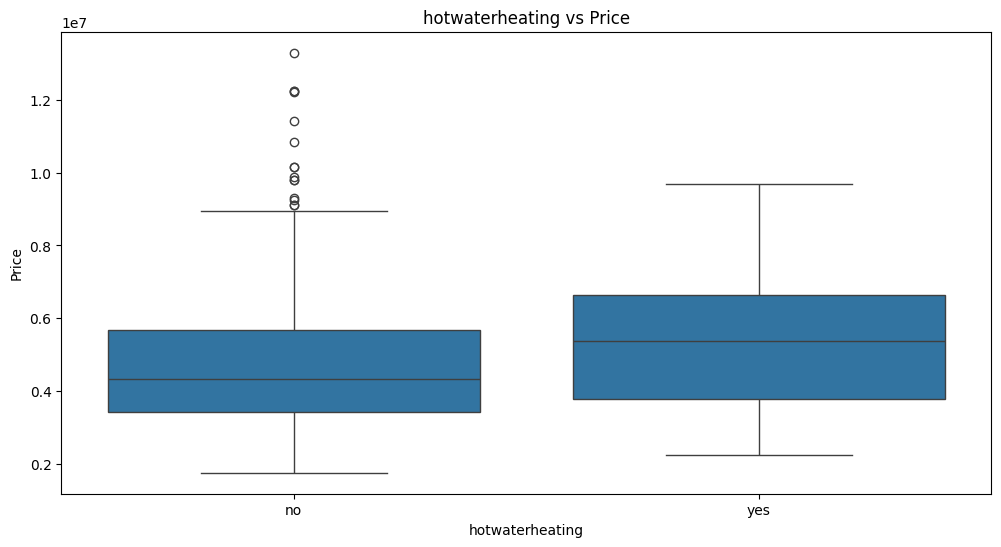

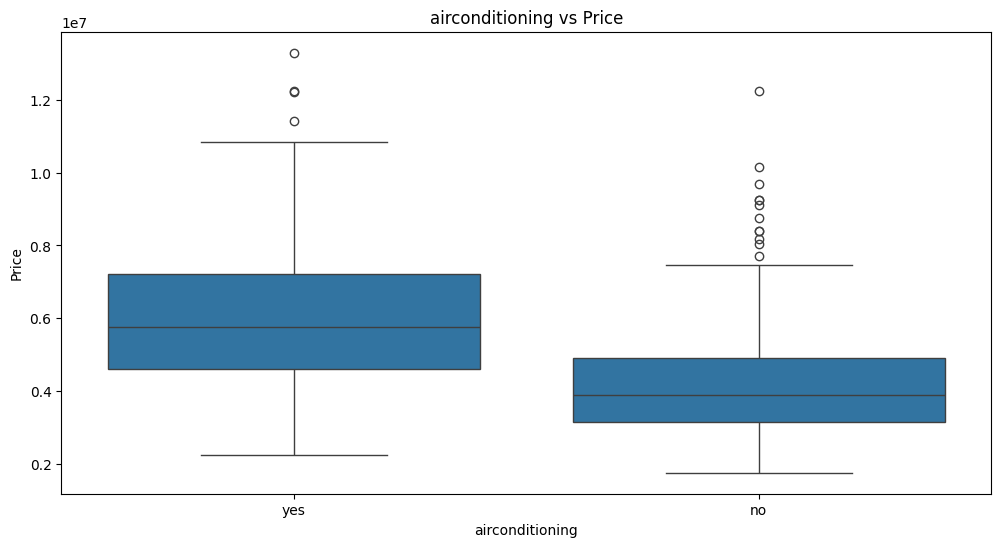

In [20]:
# Scatter plots for numerical features
numerical_features = ['stories', 'bedrooms', 'area']  # Add more if needed
for feature in numerical_features:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=df[feature], y=df['price'])
    plt.title(f'{feature} vs Price')
    plt.xlabel(feature)
    plt.ylabel('Price')
    plt.show()

# Box plots for categorical features
categorical_features = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning']
for feature in categorical_features:
    plt.figure(figsize=(12, 6))
    sns.boxplot(x=df[feature], y=df['price'])
    plt.title(f'{feature} vs Price')
    plt.xlabel(feature)
    plt.ylabel('Price')
    plt.show()


In [21]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing values in each column:\n", missing_values)

Missing values in each column:
 price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64


In [22]:
# Separate numeric and non-numeric columns
numeric_cols = df.select_dtypes(include=[np.number]).columns
non_numeric_cols = df.select_dtypes(exclude=[np.number]).columns

# Fill missing values in numeric columns with median
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())

# Fill missing values in non-numeric columns with mode
for col in non_numeric_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

In [23]:
# Calculate Z-scores to identify outliers
z_scores = np.abs(stats.zscore(df[numeric_cols]))
# Filter out rows with Z-score > 3
df = df[(z_scores < 3).all(axis=1)]

In [24]:
# Encode categorical variables using one-hot encoding
categorical_features = non_numeric_cols.tolist()  # Use all non-numeric columns for encoding
df = pd.get_dummies(df, columns=categorical_features, drop_first=True)


Task 2: Feature Engineering

In [25]:
# Initialize the scaler
scaler = StandardScaler()
# Fit and transform the numerical features
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])


Task 3: Model Selection and Training

In [32]:
# Define features (X) and target (y)
X = df.drop('price', axis=1) 
y = df['price']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f'Training set size: {X_train.shape[0]}')
print(f'Testing set size: {X_test.shape[0]}')

Training set size: 417
Testing set size: 105


In [27]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# Define the models
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree Regression': DecisionTreeRegressor(random_state=42),
    'Random Forest Regression': RandomForestRegressor(random_state=42)
}


In [28]:
# Train the models
for name, model in models.items():
    model.fit(X_train, y_train)
    print(f'{name} trained.')


Linear Regression trained.
Decision Tree Regression trained.
Random Forest Regression trained.


In [29]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for Random Forest
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30]
}

# Perform GridSearchCV
grid_search = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=5, scoring='neg_mean_absolute_error')
grid_search.fit(X_train, y_train)

# Best model from GridSearchCV
best_model = grid_search.best_estimator_
print(f'Best model: {best_model}')


Best model: RandomForestRegressor(max_depth=20, n_estimators=200, random_state=42)


In [30]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Function to evaluate the model
def evaluate_model(name, model, X_test, y_test):
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f'{name} Evaluation:')
    print(f'MAE: {mae}')
    print(f'MSE: {mse}')
    print(f'R-squared: {r2}\n')

# Evaluate each model
for name, model in models.items():
    evaluate_model(name, model, X_test, y_test)

# Evaluate the best model from GridSearchCV
evaluate_model('Best Model (Random Forest)', best_model, X_test, y_test)


Linear Regression Evaluation:
MAE: 0.5062355543491208
MSE: 0.43419614643762583
R-squared: 0.6749660946093516

Decision Tree Regression Evaluation:
MAE: 0.6741936440604401
MSE: 0.8116440534248994
R-squared: 0.3924132246768136

Random Forest Regression Evaluation:
MAE: 0.5274988110643498
MSE: 0.4643948450368612
R-squared: 0.652359719532196

Best Model (Random Forest) Evaluation:
MAE: 0.5274835756508037
MSE: 0.46970161776781677
R-squared: 0.6483871346073529

